In [1]:
import pandas as pd
from utils import load_data

# EDA for NVDA Historical Data

In [2]:
# Load the data
df = load_data('NVDA_historical_data.csv', base_dir='../data/yfinance_data')

# Summary statistics for all numeric columns
summary_stats = df.describe()

# Missing value report
missing_values = df.isna().sum()

# List columns with >5% nulls
threshold = 0.05 * len(df)
columns_with_many_nulls = missing_values[missing_values > threshold].index.tolist()

print("Summary Statistics:\n", summary_stats)
print("\nMissing Value Report:\n", missing_values)
print("\nColumns with >5% nulls:\n", columns_with_many_nulls)

Summary Statistics:
               Open         High          Low        Close    Adj Close  \
count  6421.000000  6421.000000  6421.000000  6421.000000  6421.000000   
mean      6.207884     6.320466     6.085095     6.207702     6.181334   
std      16.138328    16.424862    15.794914    16.118517    16.121352   
min       0.034896     0.035547     0.033333     0.034115     0.031291   
25%       0.277500     0.286250     0.269500     0.276750     0.253843   
50%       0.457250     0.464750     0.450750     0.457000     0.427637   
75%       4.182500     4.235750     4.116500     4.175000     4.130434   
max     139.800003   140.759995   132.419998   135.580002   135.580002   

             Volume    Dividends  Stock Splits  
count  6.421000e+03  6421.000000   6421.000000  
mean   6.060791e+08     0.000025      0.003348  
std    4.323482e+08     0.000316      0.142397  
min    1.968000e+07     0.000000      0.000000  
25%    3.456350e+08     0.000000      0.000000  
50%    5.070000e+0

# Technical Analysis Indicators with TA-Lib
This section demonstrates how to calculate and analyze common technical indicators such as Moving Averages, RSI, and MACD using TA-Lib on NVDA historical data.

In [3]:
import talib
# Calculate 20-day and 50-day Simple Moving Averages (SMA)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Calculate Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Display the last few rows to show the new indicator columns
df[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail()

,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
6416,114.250000,124.9165,117.98118,41.589800,-0.007652,1.879233,-1.886885
6417,112.279999,124.2105,118.41880,39.943932,-0.817813,1.339824,-2.157637
6418,113.059998,123.6640,118.85288,40.940507,-1.381013,0.795656,-2.176669
6419,111.589996,123.0665,119.19208,39.606589,-1.923793,0.251767,-2.175559
6420,103.730003,122.0380,119.37950,33.349720,-2.954132,-0.389413,-2.564719


# Visualize Technical Indicators
Visualize the stock price along with SMA, RSI, and MACD to better understand their impact on NVDA price trends.

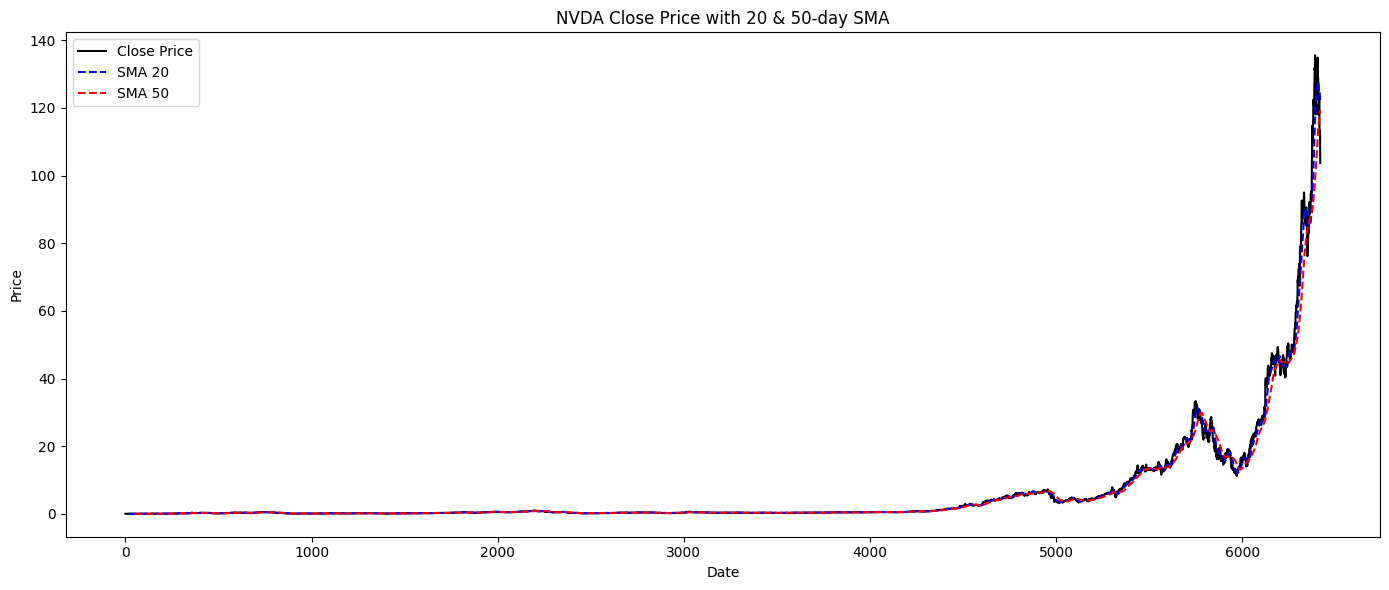

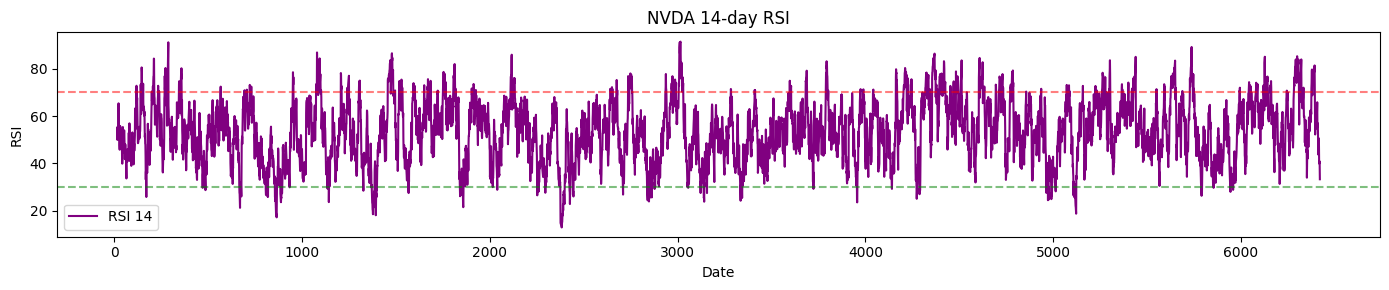

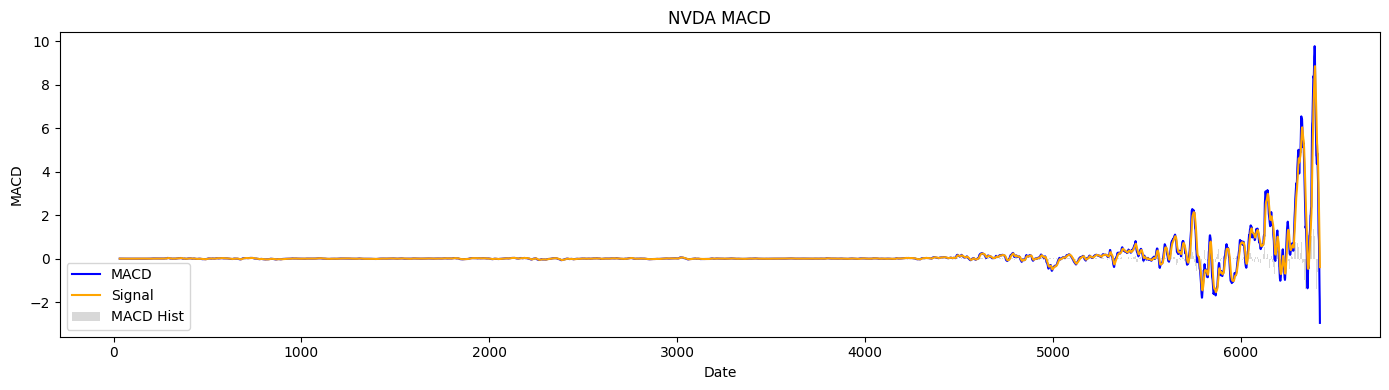

In [4]:
import matplotlib.pyplot as plt

# Plot Close price with SMA overlays
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['SMA_20'], label='SMA 20', color='blue', linestyle='--')
plt.plot(df['SMA_50'], label='SMA 50', color='red', linestyle='--')
plt.title('NVDA Close Price with 20 & 50-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('NVDA 14-day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()

# Plot MACD and Signal
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal', color='orange')
plt.bar(df.index, df['MACD_Hist'], label='MACD Hist', color='gray', alpha=0.3)
plt.title('NVDA MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.tight_layout()
plt.show()